In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u

In [2]:
%matplotlib inline
# initialization
#phoebe.mpi_on(nprocs=4)
#phoebe.mpi_off()
logger = phoebe.logger(clevel=None,flevel='INFO',filename='phoebe.log')

In [3]:
filename='/data/SuperWASP/1SWASP J144508.70+050514.4.csv'

times, fluxes, sigmas = np.loadtxt(
    filename,
    dtype={
        'names': ('tmid', 'mag', 'mag_err'),
        'formats': ('f4', 'f4', 'f4'),
    },
    unpack=True,
    delimiter=',',
    usecols=(0,2,3),
    skiprows=1
)


In [11]:
orbit_parameters = {
    """ semi-major access (solar radii) """
    'sma': 4.93363,
    """ orbital eccentricity """
    'ecc': 0.00278,
    """ inclination (degrees) """
    'incl': 76.75432,
    """ orbital period """
    'period': 10.903857574156442 * u.hour,
    'long_an': 0.0,
    'dpdt': 0.0,
    'dperdt': 0.0,
    'per0': 0.0,
    """ mass ratio """
    'q': 1.27846,
}

primary_parameters = { 
    'requiv': 1.764295,
    'teff': 13719.0,
    'mass': 3.430250
}

secondary_parameters = {
    'requiv': 0.792421,
    'teff': 6883.0,
    'mass': 4.385437
}

envelope_parameters = {
    
}

In [9]:
phases = phoebe.linspace(0,1,201)
primary='primary'
secondary='secondary'
orbit='binary'

# create a default bundle
b = phoebe.Bundle()
#b = phoebe.default_binary(contact=True)

b.add_star(component=primary, color='blue', **primary_parameters)
b.add_star(component=secondary, color='red', **secondary_parameters)
b.add_orbit(component=orbit, **orbit_parameters)
b.add_constraint('semidetached', component=primary)
b.add_constraint('semidetached', component=secondary)

b.set_hierarchy(phoebe.parameters.hierarchy.binaryorbit, b[orbit], b[primary], b[secondary], b['contact_envelope'])
b.add_compute()

#b.add_dataset(phoebe.parameters.dataset.lc, times=times, fluxes=fluxes, sigmas=sigmas, dataset='lc01')
b.add_dataset(phoebe.parameters.dataset.lc, times=times, fluxes=fluxes, dataset='lc01')
#b.add_dataset(phoebe.parameters.dataset.lc, times=times, dataset='lc01')
#b.add_dataset('lc', times=np.linspace(0,1,201), dataset='mylc')
b.add_dataset(phoebe.parameters.dataset.rv, compute_phases=phases, dataset='rv01')
b.add_dataset(phoebe.parameters.dataset.orb, compute_phases=phases, dataset='orb01')
#b.add_dataset(phoebe.parameters.dataset.mesh, compute_phases=[0], dataset='mesh01')
#b.set_value('columns', '*')

b.flip_constraint('compute_phases', solve_for='compute_times')
print(b.get_hierarchy())



    orbit:binary
    
        star:primary
        star:secondary
    



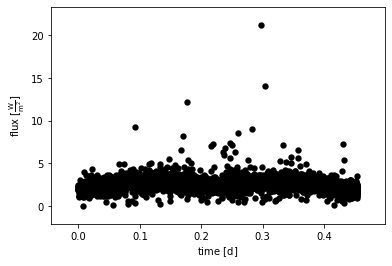

In [12]:
afig, mplfig = b['lc'].plot(show=True)

In [17]:
b.run_compute(model='default', skip_checks=True)
#print(b.get_parameter(qualifier='compute_times', kind='mesh'))

ValueError: Could not compute ldint with ldatm='ck2004'.  Try changing atm to a table that covers a sufficient range of values.  If necessary, set atm to 'blackbody' and/or ld_mode to 'manual' (in which case coefficients will need to be explicitly provided via ld_coeffs). Enable 'warning' logger to see out-of-bound arrays.

In [ ]:
afig, mplfig = b['lc@default'].plot(show=True)

In [ ]:
afig, mplfig = b['lc01@default'].plot(x='phases', show=True)

In [ ]:
b.plot(show=True)

In [ ]:
afig, mplfig = b.plot(kind='mesh', fc='teffs', ec='none', show=True)

In [16]:
print(b['primary'])

ParameterSet: 43 parameters
*       requiv@primary@component: 2.013275176537638 solRad
*   requiv_max@primary@component: 2.013275176537638 solRad
          teff@primary@component: 13719.0 K
          abun@primary@component: 0.0
*         logg@primary@component: 3.8297455950757
       syncpar@primary@component: 1.0
*       period@primary@component: 1.0 d
*         freq@primary@component: 6.283185 rad / d
         pitch@primary@component: 0.0 deg
           yaw@primary@component: 0.0 deg
*         incl@primary@component: 90.0 deg
*      long_an@primary@component: 0.0 deg
     gravb_bol@primary@component: 0.32
  irrad_frac_refl_bol@primary...: 0.6
* irrad_frac_lost_bol@primary...: 0.4
   ld_mode_bol@primary@component: lookup
   ld_func_bol@primary@component: logarithmic
  ld_coeffs_source_bol@primar...: auto
*         mass@primary@component: 0.9988131358058301 solMass
         freq@primary@constraint: 6.283185 / {period@primary@component}
         logg@primary@constraint: log10((({mass@pr

In [ ]:
print(b ['secondary'])